# Module 6: Root fining and optimization


Finding an extremum (minimum or maximum) of a function $f(x)$ of a single variable, we need to solve the equation $f‚Äô(x)=0$, assuming $f(x)$ is differentiable. Hence, we start with the problem of root fining.


## Root finding in 1D: [Bisection method](https://en.wikipedia.org/wiki/Bisection_method)

Given the interval $[a, b]$ such that $f(a)f(b) < 0$, i.e., $f(a)$ has the opposite sign of $f(b)$, find $x \in [a, b]$, such that $f(x) = 0$.

In [1]:
function bisection(f::Function, a::Real, b::Real; max_nsteps::Int = 1000, abstol::Real = 1e-15)
    
    @assert f(a) * f(b) < 0
    
    mid = a + (b - a) / 2
    
    for step = 1:max_nsteps
        
        @show mid
        
        if abs(f(mid)) < abstol
            return mid
        end
        
        if f(a) * f(mid) < 0
           b = mid 
        else 
            # f(mid) * f(b) < 0
            a = mid
        end
        
        mid = a + (b - a) / 2
    end
    
    println("Maximum number of iterations is reached")
    
    return mid
end

bisection (generic function with 3 methods)

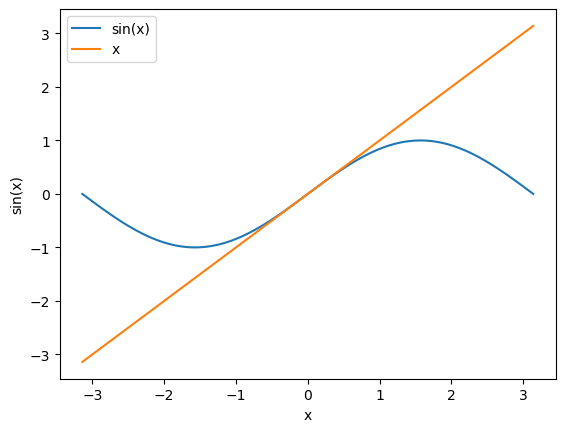

In [20]:
using PyPlot

x = range(-œÄ, œÄ, 100)

plot(x, sin.(x), label="sin(x)")
plot(x, x, label="x")

legend()
xlabel("x")
ylabel("sin(x)")
show()

In [3]:
bisection(sin, -1.5, 3)

mid = 0.75
mid = -0.375
mid = 0.1875
mid = -0.09375
mid = 0.046875
mid = -0.0234375
mid = 0.01171875
mid = -0.005859375
mid = 0.0029296875
mid = -0.00146484375
mid = 0.000732421875
mid = -0.0003662109375
mid = 0.00018310546875
mid = -9.1552734375e-5
mid = 4.57763671875e-5
mid = -2.288818359375e-5
mid = 1.1444091796875e-5
mid = -5.7220458984375e-6
mid = 2.86102294921875e-6
mid = -1.430511474609375e-6
mid = 7.152557373046875e-7
mid = -3.5762786865234375e-7
mid = 1.7881393432617188e-7
mid = -8.940696716308594e-8
mid = 4.470348358154297e-8
mid = -2.2351741790771484e-8
mid = 1.1175870895385742e-8
mid = -5.587935447692871e-9
mid = 2.7939677238464355e-9
mid = -1.3969838619232178e-9
mid = 6.984919309616089e-10
mid = -3.4924596548080444e-10
mid = 1.7462298274040222e-10
mid = -8.731149137020111e-11
mid = 4.3655745685100555e-11
mid = -2.1827872842550278e-11
mid = 1.0913936421275139e-11
mid = -5.4569682106375694e-12
mid = 2.7284841053187847e-12
mid = -1.3642420526593924e-12
mid = 6.821210263296962

6.661338147750939e-16

## [Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) in 1D

[This is an iterative method](http://dlmf.nist.gov/3.8.ii) for real twice-continuously differentiable, or complex analytic, function:

$$
    x_{n + 1} = x_n - \frac{f(x_n)}{f'(x_n)}.
$$

Note that there are [cases](https://en.wikipedia.org/wiki/Newton%27s_method) when the method does not converge. 

![!](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Newton_iteration.svg/554px-Newton_iteration.svg.png)

In [4]:
function newton(f::Function, diff_f::Function, x‚ÇÄ; max_nsteps::Int = 1000, abstol::Real = 1e-15)
     x‚Çô = x‚ÇÄ
    
    for step = 1:max_nsteps
        
        if abs(f(x‚Çô)) < abstol
           return x‚Çô 
        end
        
        # x‚Çô = x‚Çô - f(x‚Çô) / diff_f(x‚Çô)
        x‚Çô -= f(x‚Çô) / diff_f(x‚Çô)
        
        @show x‚Çô
    end
    
    println("Maximum number of iterations is reached")
    
    return x‚Çô 
end

newton (generic function with 3 methods)

In [5]:
newton(sin, cos, -1.5)

x‚Çô = 12.60141994717172
x‚Çô = 12.566356255118672
x‚Çô = 12.566370614359174
x‚Çô = 12.566370614359172


12.566370614359172

In [6]:
12.566370614359172 / (œÄ)

4.0

## Fixed-Point Iterations

The fixed point is a solution to the equation

$$x = f(x).$$

The fixed point is easy to find via the following simple iterative procedure: $x_{n+1} = f(x_n)$. [Under certain conitions](https://en.wikipedia.org/wiki/Fixed-point_theorem), $x_n$ is guaranteed to converge to the fixed point as $n\to\infty$.

In [11]:
function fixed_point(f::Function, x‚ÇÄ; max_nsteps::Int = 1000, abstol::Real = 1e-15)
    x‚Çô = x‚Çô‚Çä‚ÇÅ = x‚ÇÄ
    
    for step = 1:max_nsteps
        
        x‚Çô‚Çä‚ÇÅ = f(x‚Çô)
        
        if abs(x‚Çô - x‚Çô‚Çä‚ÇÅ) < abstol
            return x‚Çô
        end
        
        x‚Çô = x‚Çô‚Çä‚ÇÅ 
        
        @show x‚Çô
    end
    
    println("Maximum number of iterations is reached")
    
    return x‚Çô 
end

fixed_point (generic function with 3 methods)

In [14]:
fixed_point(sin, 0.25)

x‚Çô = 0.24740395925452294
x‚Çô = 0.24488779227422167
x‚Çô = 0.24244746635891098
x‚Çô = 0.2400792291404323
x‚Çô = 0.23777958395381066
x‚Çô = 0.23554526780759885
x‚Çô = 0.23337323163481075
x‚Çô = 0.23126062255013285
x‚Çô = 0.22920476787653393
x‚Çô = 0.22720316073613017
x‚Çô = 0.22525344702716119
x‚Çô = 0.22335341363196864
x‚Çô = 0.2215009777205821
x‚Çô = 0.21969417703143557
x‚Çô = 0.21793116102529686
x‚Çô = 0.21621018282105392
x‚Çô = 0.21452959183286896
x‚Çô = 0.21288782703763362
x‚Çô = 0.21128341080984983
x‚Çô = 0.20971494326819645
x‚Çô = 0.20818109708427268
x‚Çô = 0.20668061270946184
x‚Çô = 0.2052122939806396
x‚Çô = 0.2037750040696522
x‚Çô = 0.20236766174518792
x‚Çô = 0.2009892379189273
x‚Çô = 0.1996387524507407
x‚Çô = 0.1983152711902526
x‚Çô = 0.1970179032343564
x‚Çô = 0.19574579838227227
x‚Çô = 0.19449814477153077
x‚Çô = 0.19327416667985736
x‚Çô = 0.19207312247935696
x‚Çô = 0.19089430273066899
x‚Çô = 0.189737028405902
x‚Çô = 0.1886006492301776
x‚Çô = 0.18748454213253044
x‚Çô = 0.186

x‚Çô = 0.08330219659447732
x‚Çô = 0.08320588747223559
x‚Çô = 0.08310991192789284
x‚Çô = 0.08301426803918087
x‚Çô = 0.08291895389930999
x‚Çô = 0.08282396761680913
x‚Çô = 0.08272930731536789
x‚Çô = 0.08263497113368062
x‚Çô = 0.08254095722529249
x‚Çô = 0.08244726375844738
x‚Çô = 0.08235388891593778
x‚Çô = 0.08226083089495653
x‚Çô = 0.08216808790695034
x‚Çô = 0.0820756581774752
x‚Çô = 0.08198353994605355
x‚Çô = 0.08189173146603325
x‚Çô = 0.0818002310044482
x‚Çô = 0.0817090368418808
x‚Çô = 0.08161814727232593
x‚Çô = 0.08152756060305678
x‚Çô = 0.0814372751544922
x‚Çô = 0.08134728926006567
x‚Çô = 0.08125760126609591
x‚Çô = 0.08116820953165906
x‚Çô = 0.08107911242846233
x‚Çô = 0.08099030834071928
x‚Çô = 0.08090179566502652
x‚Çô = 0.08081357281024194
x‚Çô = 0.0807256381973644
x‚Çô = 0.08063799025941483
x‚Çô = 0.08055062744131873
x‚Çô = 0.0804635481997902
x‚Çô = 0.08037675100321715
x‚Çô = 0.08029023433154807
x‚Çô = 0.08020399667617999
x‚Çô = 0.08011803653984785
x‚Çô = 0.08003235243651514
x‚Çô = 

0.05345592283357173

In [15]:
fixed_point(cos, 0.25)

x‚Çô = 0.9689124217106447
x‚Çô = 0.5661963244509127
x‚Çô = 0.8439474651598078
x‚Çô = 0.6645181803460104
x‚Çô = 0.787214004993313
x‚Çô = 0.7058216222217143
x‚Çô = 0.761078855759294
x‚Çô = 0.7240923421872705
x‚Çô = 0.7491010136260781
x‚Çô = 0.7323013570816245
x‚Çô = 0.7436377252305164
x‚Çô = 0.7360108039022628
x‚Çô = 0.7411525424307221
x‚Çô = 0.7376909229991697
x‚Çô = 0.7400235713587021
x‚Çô = 0.738452664642206
x‚Çô = 0.7395110238024618
x‚Çô = 0.7387981811724498
x‚Çô = 0.7392783971315969
x‚Çô = 0.7389549345142898
x‚Çô = 0.7391728303616282
x‚Çô = 0.7390260565203767
x‚Çô = 0.7391249266976642
x‚Çô = 0.7390583272614917
x‚Çô = 0.7391031897624654
x‚Çô = 0.7390729699872061
x‚Çô = 0.7390933264571526
x‚Çô = 0.7390796141239898
x‚Çô = 0.739088850930107
x‚Çô = 0.7390826289125442
x‚Çô = 0.7390868201412102
x‚Çô = 0.7390839968804297
x‚Çô = 0.7390858986634274
x‚Çô = 0.7390846175997838
x‚Çô = 0.7390854805397826
x‚Çô = 0.7390848992530726
x‚Çô = 0.7390852908148172
x‚Çô = 0.7390850270541269
x‚Çô = 0.7390852

0.7390851332151611

In [19]:
fixed_point(x -> exp(-x), 0.25)

x‚Çô = 0.7788007830714049
x‚Çô = 0.4589560693076638
x‚Çô = 0.6319430059834795
x‚Çô = 0.5315579766395019
x‚Çô = 0.5876886508726961
x‚Çô = 0.5556100104627527
x‚Çô = 0.5737221778988232
x‚Çô = 0.5634243651210017
x‚Çô = 0.5692563807119256
x‚Çô = 0.5659461307216159
x‚Çô = 0.5678226580691264
x‚Çô = 0.5667581224502082
x‚Çô = 0.567361777908229
x‚Çô = 0.5670193902268157
x‚Çô = 0.5672135639205953
x‚Çô = 0.5671034366599815
x‚Çô = 0.5671658936469909
x‚Çô = 0.5671304712803379
x‚Çô = 0.5671505607396377
x‚Çô = 0.5671391671059771
x‚Çô = 0.5671456289186934
x‚Çô = 0.567141964141697
x‚Çô = 0.5671440425943294
x‚Çô = 0.5671428638135262
x‚Çô = 0.5671435323510408
x‚Çô = 0.56714315319444
x‚Çô = 0.5671433682305509
x‚Çô = 0.5671432462742597
x‚Çô = 0.5671433154409509
x‚Çô = 0.5671432762135257
x‚Çô = 0.5671432984610966
x‚Çô = 0.5671432858435359
x‚Çô = 0.5671432929995007
x‚Çô = 0.5671432889410434
x‚Çô = 0.5671432912427702
x‚Çô = 0.5671432899373613
x‚Çô = 0.5671432906777152
x‚Çô = 0.5671432902578284
x‚Çô = 0.5671432

0.5671432904097833

## [Acceleration of Convergence](http://dlmf.nist.gov/3.9)


[Aitken's process](http://dlmf.nist.gov/3.9.iii): Let $s_n = a + c q^n$, where $c$ and $|q| < 1$ is unknown. If $q$ is very close to 1, then the sequence $s_n$ very solwly converges to $a$. In other words we have to evaluate $s_n$ for a very large $n$ to get a good approximation to $a$.

In this case, Aitken's process comes to the rescue!  We just need to know 3 consecutive values $s_{n}, s_{n+1}, s_{n+2}$ to get $a$

$$
    s_n - \frac{(s_{n+1} - s_n)^2}{s_{n+2} - 2 s_{n+1} + s_n} = a.
$$

In [48]:
function Aitken(s‚Çô, s‚Çô‚Çä‚ÇÅ, s‚Çô‚Çä‚ÇÇ)
    
    denominator = s‚Çô‚Çä‚ÇÇ - 2 * s‚Çô‚Çä‚ÇÅ + s‚Çô
    
    if abs(denominator) ‚âà 0
        return s‚Çô‚Çä‚ÇÇ
    else
        return s‚Çô - (s‚Çô‚Çä‚ÇÅ - s‚Çô) ^ 2 / denominator
    end
end

Aitken (generic function with 1 method)

In [50]:
function fixed_point_Aitken(f::Function, x‚ÇÄ; max_nsteps::Int = 1000, abstol::Real = 1e-15)
    x‚Çô = x‚Çô‚Çä‚ÇÅ = x‚ÇÄ
    
    for step = 1:max_nsteps
        
        s‚Çô = f(x‚Çô)
        s‚Çô‚Çä‚ÇÅ = f(s‚Çô) # f(f(x‚Çô))
        s‚Çô‚Çä‚ÇÇ = f(s‚Çô‚Çä‚ÇÅ) # f(f(f(x‚Çô)))
        
        x‚Çô‚Çä‚ÇÅ = Aitken(s‚Çô, s‚Çô‚Çä‚ÇÅ, s‚Çô‚Çä‚ÇÇ)
        
        if abs(x‚Çô - x‚Çô‚Çä‚ÇÅ) < abstol
            return x‚Çô
        end
        
        x‚Çô = x‚Çô‚Çä‚ÇÅ 
        
        @show x‚Çô
    end
    
    println("Maximum number of iterations is reached")
    
    return x‚Çô 
end

fixed_point_Aitken (generic function with 3 methods)

In [51]:
fixed_point_Aitken(cos, 0.25)

x‚Çô = 0.7305758113012142
x‚Çô = 0.739080281588056
x‚Çô = 0.739085133213572
x‚Çô = 0.7390851332151607


0.7390851332151607

In [52]:
fixed_point_Aitken(sin, 0.25)

x‚Çô = 0.1639254865624003
x‚Çô = 0.10850502105895535
x‚Çô = 0.07211014406202754
x‚Çô = 0.048006842964687824
x‚Çô = 0.03198490241765692
x‚Çô = 0.02131745236920896
x‚Çô = 0.014209912845622813
x‚Çô = 0.009472765063690823
x‚Çô = 0.006315025877110901
x‚Çô = 0.004209970866187592
x‚Çô = 0.002806634659521387
x‚Çô = 0.0018710940692318633
x‚Çô = 0.0012474209799365618
x‚Çô = 0.0008316991125405099
x‚Çô = 0.0005545821898038256
x‚Çô = 0.0003682350793442149
x‚Çô = 0.00024048295398966025
x‚Çô = 0.00017440878004181622
x‚Çô = 0.00017440877738919628
x‚Çô = 0.00014556466071585685
x‚Çô = 0.00014556465917366695
x‚Çô = 0.00014556465763147707
x‚Çô = 0.00014556465608928727
x‚Çô = 0.00013581514398615157
x‚Çô = 0.00013581514273354524
x‚Çô = 0.00013581514148093898
x‚Çô = 0.00013581514022833273
x‚Çô = 0.00013581513897572653
x‚Çô = 0.00013581513772312036
x‚Çô = 0.00012938328143277103
x‚Çô = 0.0001293832803498308
x‚Çô = 0.0001293832792668906
x‚Çô = 0.00012938327818395043
x‚Çô = 0.0001293832771010103
x‚Çô = 0.0001293

x‚Çô = 9.217851783589914e-5
x‚Çô = 9.217851744428429e-5
x‚Çô = 9.217851705266945e-5
x‚Çô = 9.217851666105461e-5
x‚Çô = 9.217851626943977e-5
x‚Çô = 9.217851587782493e-5
x‚Çô = 9.217851548621008e-5
x‚Çô = 9.217851509459524e-5
x‚Çô = 9.21785147029804e-5
x‚Çô = 9.092116659236078e-5
x‚Çô = 9.092116621655364e-5
x‚Çô = 8.976327625483452e-5
x‚Çô = 8.976327589320314e-5
x‚Çô = 8.869109153169353e-5
x‚Çô = 8.86910911828666e-5
x‚Çô = 8.869109083403968e-5
x‚Çô = 8.869109048521276e-5
x‚Çô = 8.869109013638583e-5
x‚Çô = 8.869108978755891e-5
x‚Çô = 8.869108943873198e-5
x‚Çô = 8.86910890899051e-5
x‚Çô = 8.869108874107822e-5
x‚Çô = 8.869108839225133e-5
x‚Çô = 8.869108804342445e-5
x‚Çô = 8.869108769459756e-5
x‚Çô = 8.869108734577068e-5
x‚Çô = 8.86910869969438e-5
x‚Çô = 8.869108664811691e-5
x‚Çô = 8.869108629929003e-5
x‚Çô = 8.869108595046315e-5
x‚Çô = 8.86910856016363e-5
x‚Çô = 8.869108525280946e-5
x‚Çô = 8.869108490398262e-5
x‚Çô = 8.869108455515577e-5
x‚Çô = 8.869108420632893e-5
x‚Çô = 8.869108385750209e

x‚Çô = 7.78247940283375e-5
x‚Çô = 7.782479379265684e-5
x‚Çô = 7.782479355697619e-5
x‚Çô = 7.782479332129553e-5
x‚Çô = 7.782479308561487e-5
x‚Çô = 7.782479284993422e-5
x‚Çô = 7.782479261425356e-5
x‚Çô = 7.78247923785729e-5
x‚Çô = 7.782479214289225e-5
x‚Çô = 7.782479190721159e-5
x‚Çô = 7.782479167153094e-5
x‚Çô = 7.782479143585028e-5
x‚Çô = 7.782479120016966e-5
x‚Çô = 7.782479096448905e-5
x‚Çô = 7.782479072880843e-5
x‚Çô = 7.782479049312782e-5
x‚Çô = 7.78247902574472e-5
x‚Çô = 7.782479002176659e-5
x‚Çô = 7.782478978608597e-5
x‚Çô = 7.782478955040535e-5
x‚Çô = 7.782478931472474e-5
x‚Çô = 7.782478907904412e-5
x‚Çô = 7.782478884336351e-5
x‚Çô = 7.782478860768289e-5
x‚Çô = 7.782478837200228e-5
x‚Çô = 7.782478813632166e-5
x‚Çô = 7.782478790064104e-5
x‚Çô = 7.782478766496043e-5
x‚Çô = 7.782478742927981e-5
x‚Çô = 7.78247871935992e-5
x‚Çô = 7.782478695791858e-5
x‚Çô = 7.7824786722238e-5
x‚Çô = 7.782478648655743e-5
x‚Çô = 7.782478625087686e-5
x‚Çô = 7.782478601519628e-5
x‚Çô = 7.78247857795157e-5

7.782478247998766e-5

## [The Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

is a set of points $\{c\}$ for which the function $f(z) = z^2 + c$ has a finite fixed point when the iteration starts from $z_0 = 0$. $|z_n|$ remains finite as $n \to \infty$ where $z_{n+1} = f(z_{n})$.

  2.679725 seconds (211.04 M allocations: 6.217 GiB, 5.42% gc time, 1.52% compilation time: 25% of which was recompilation)


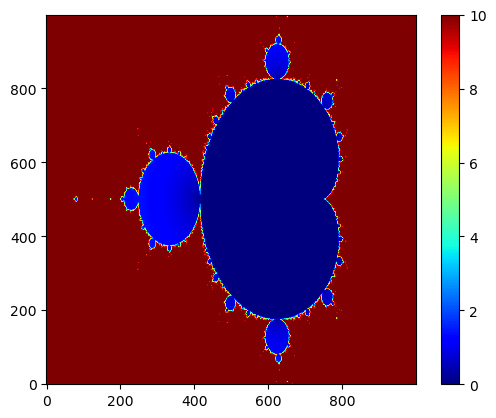

In [56]:
x = range(-2, 1, 1000)
y = range(-1, 1, 1000)

image = zeros(length(y), length(x))

@time begin

Threads.@threads for k = 1:length(x)
    for j = 1:length(y)
    
        c = x[k] + im * y[j]
        
        f(z) = z ^ 2 + c
        
        # Iterating
        z‚Çô = 0im
        for step = 1:200
            z‚Çô = f(z‚Çô) 
        end
        
        # Coloring
        val = abs(f(z‚Çô) - z‚Çô)
        if val < 10
            image[j, k] = val
        else
            image[j, k] = 10
        end
    end
end

end

using PyPlot

imshow(image, origin="lower", cmap="jet")
colorbar()
show()

## Introduction to Optimization

Throughout, bold letters (e.g., ${\bf x}$) denote an $n$-dimensional real vector.
The problem of **maximization** (i.e., finding a maximum of a real-valued function), 

$$
    \mbox{maximize }_{{\bf x}} \, f({\bf x})
$$

is equivalent to the **minimization** problem

$$
	\mbox{minimize }_{{\bf x}} \, -f({\bf x}).
$$

Hence we only study the latter problem.

The **constrained minimization**

$$
	\mbox{minimize }_{{\bf x}} \, f({\bf x})
$$
$$
	\mbox{subject to } \, g({\bf x}) = 0,
$$

finding the minimum of the function $f({\bf x})$ under the equality constrain $g({\bf x}) = 0$, can be reduced to the unconstrained minimization via [the method of Lagrange multipliers](https://en.wikipedia.org/wiki/Lagrange_multiplier)

$$
    \mbox{minimize }_{{\bf x}, \lambda} \, f({\bf x}) + \lambda g({\bf x}).
$$


The general problem of constrained minimization

$$
	\mbox{minimize }_{{\bf x}} \, f({\bf x})
$$
$$
	\mbox{subject to } g({\bf x}) = 0
$$
$$
    \qquad\qquad h({\bf x}) \leq 0.
$$

can be transformed into the unconstrained minimization by the following steps

$$
	\mbox{minimize }_{{\bf x}, y} \, f({\bf x})
$$
$$
	\mbox{subject to } g({\bf x}) = 0
$$
$$
    \qquad\qquad\qquad h({\bf x}) + y^2 =  0,
$$

and via the method of Lagrange multipliers we get

$$
	\mbox{minimize }_{{\bf x}, y, \lambda_1, \lambda_2} \, f({\bf x}) + \lambda_1 g({\bf x}) + \lambda_2 \left(h({\bf x}) + y^2\right).
$$

## [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)

An iterative method to find a local minimum of the function $f({\bf x})$,

$$
    {\bf x}_{n+1} = {\bf x}_n - \gamma \nabla f({\bf x}_n).
$$


In [132]:
using LinearAlgebra

function grad_descent(‚àáf::Function, Œ≥::Real, ùê±‚ÇÄ::Vector; max_nsteps::Int = 1000, abstol::Real = 1e-10)
     
    ùê±‚Çô = ùê±‚Çô‚Çä‚ÇÅ = ùê±‚ÇÄ
    
    history_ùê± = [ùê±‚ÇÄ]
    
    for step = 1:max_nsteps
        
        ùê±‚Çô‚Çä‚ÇÅ = ùê±‚Çô - Œ≥ * ‚àáf(ùê±‚Çô)
    
        push!(history_ùê±, ùê±‚Çô‚Çä‚ÇÅ)
        
        if norm(ùê±‚Çô‚Çä‚ÇÅ - ùê±‚Çô) < abstol
           return hcat(history_ùê±...) 
        end
        
        ùê±‚Çô = ùê±‚Çô‚Çä‚ÇÅ 
    end
    
    println("Maximum number of iterations is reached")
    
    return hcat(history_ùê±...)
end

grad_descent (generic function with 1 method)

In [156]:
f(x‚ÇÅ, x‚ÇÇ) = -exp.(-x‚ÇÅ .^ 2 .- 2 * x‚ÇÇ .^ 2)

history_ùê± = grad_descent(
    # ‚àáf
    ùê± -> [2 * ùê±[1], 4 * ùê±[2]] .* exp(-ùê±[1] ^ 2 - 2 * ùê±[2] ^ 2),
    
    # Œ≥
    0.1,

    # ùê±‚ÇÄ
    [1., 1.]
);

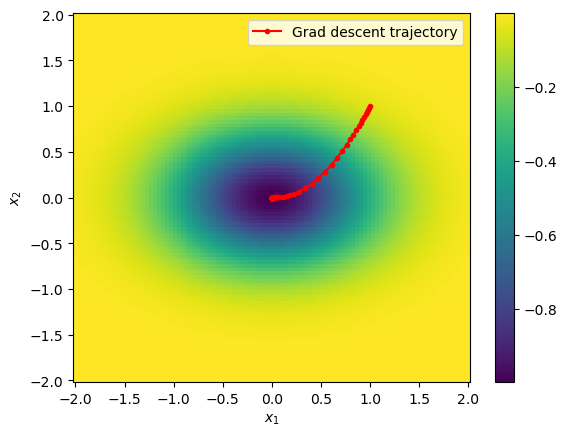

In [157]:
y = range(-2, 2, 100)
x = y'

pcolormesh(x, x, f(x, y))
plot(history_ùê±[1, :], history_ùê±[2, :], "r.-", label="Grad descent trajectory")

xlabel(L"x_1")
ylabel(L"x_2")
legend()
colorbar()
show()

## Newton's method for minimization

$$
    H ({\bf x}_{n+1}
$$

In [158]:
function newton_min(‚àáf::Function, Hessian::Function, ùê±‚ÇÄ::Vector; max_nsteps::Int = 1000, abstol::Real = 1e-10)
     
    ùê±‚Çô = ùê±‚Çô‚Çä‚ÇÅ = ùê±‚ÇÄ
    
    history_ùê± = [ùê±‚ÇÄ]
    
    for step = 1:max_nsteps
        
        ùê±‚Çô‚Çä‚ÇÅ = ùê±‚Çô - Hessian(ùê±‚Çô) \ ‚àáf(ùê±‚Çô)
        
        push!(history_ùê±, ùê±‚Çô‚Çä‚ÇÅ)
        
        if norm(ùê±‚Çô‚Çä‚ÇÅ - ùê±‚Çô) < abstol
           return hcat(history_ùê±...) 
        end
        
        ùê±‚Çô = ùê±‚Çô‚Çä‚ÇÅ 
    end
    
    println("Maximum number of iterations is reached")
    
    return hcat(history_ùê±...)
end

newton_min (generic function with 1 method)

In [ ]:
newton_history_ùê± = newton_min(
    # ‚àáf
    ùê± -> [2 * ùê±[1], 4 * ùê±[2]] .* exp(-ùê±[1] ^ 2 - 2 * ùê±[2] ^ 2),
    
    # Hessian
    ùê± -> [[], []],

    # ùê±‚ÇÄ
    [1., 1.]
);